In [69]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [70]:
df = pd.read_csv(r'C:\Users\admin\Documents\TY-B77\Housing.csv', encoding="ISO-8859-1").head(10000)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,322059264,20140926T000000,279000.0,2,1.00,1020,47044,1.0,0,0,...,7,1020,0,1904,1958,98042,47.4206,-122.155,1930,12139
9996,5557500270,20150209T000000,262000.0,3,1.50,1700,9579,1.0,0,0,...,7,1100,600,1962,0,98023,47.3209,-122.338,1700,9628
9997,9164100125,20140807T000000,533000.0,4,1.00,1550,4750,1.5,0,0,...,7,1550,0,1919,0,98117,47.6824,-122.389,1320,4750
9998,7370600045,20150402T000000,640000.0,3,1.75,1680,8100,1.0,0,2,...,8,1680,0,1950,0,98177,47.7212,-122.364,1880,7750


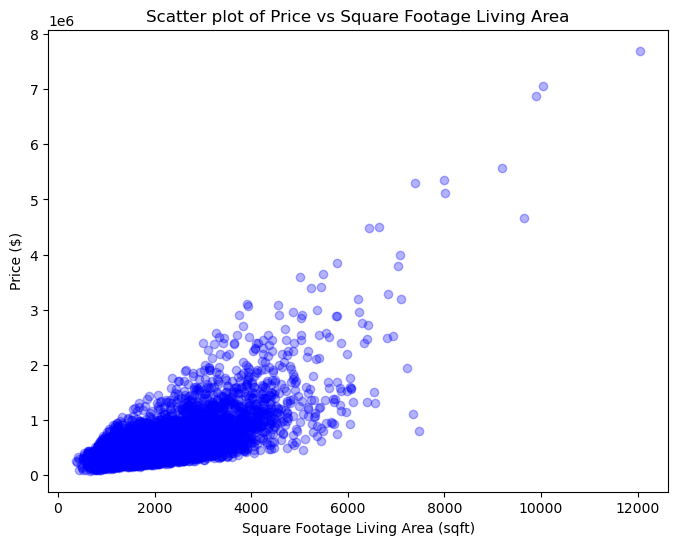

In [71]:

plt.figure(figsize=(8,6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.3, color='blue')
plt.title('Scatter plot of Price vs Square Footage Living Area')
plt.xlabel('Square Footage Living Area (sqft)')
plt.ylabel('Price ($)')
plt.show()


In [72]:
X = df[['sqft_living']]  # predictor (2D array)
y = df['price']          # target variable

In [73]:
# Step 3: Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Step 4: Build and train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
# Step 5: Make predictions
y_pred = model.predict(X_test)

In [76]:
# Step 6: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Eval\n----------------")
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Model Eval
----------------
Mean Squared Error: 72849127228.62883
R2 Score: 0.5087497607619044


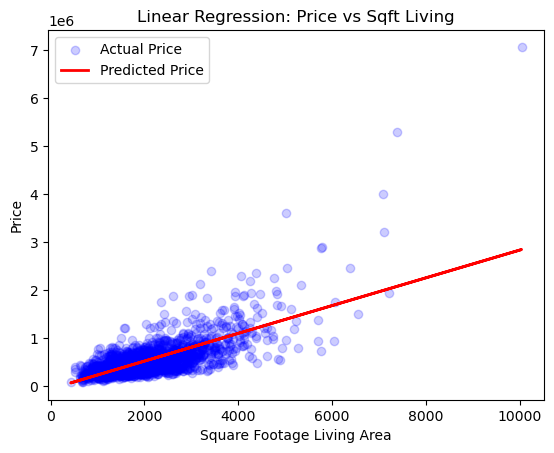

In [77]:
plt.scatter(X_test, y_test, color='blue', label='Actual Price', alpha = 0.2)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Price')
plt.xlabel('Square Footage Living Area')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Sqft Living')
plt.legend()
plt.show()

Predicted price for 3000 sqft: $807,934.58


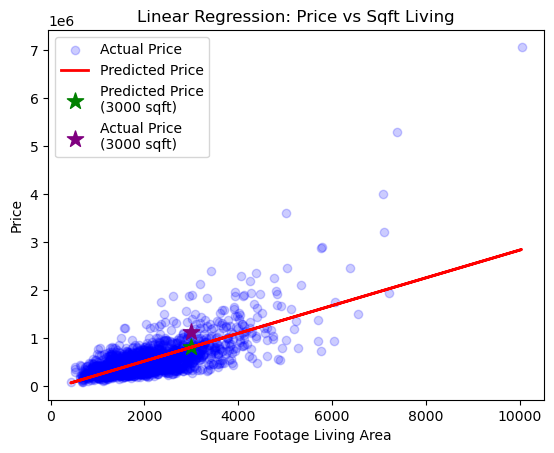

In [78]:
def predict_price(sqft_input):
    # Create a DataFrame with the same column name used for training
    sqft_array = pd.DataFrame([[sqft_input]], columns=['sqft_living'])
    predicted_price = model.predict(sqft_array)
    return predicted_price[0]

# Example usage:
sqft = 3000

print(f'Predicted price for {sqft} sqft: ${predict_price(sqft):,.2f}')
predicted_price = predict_price(sqft)

plt.scatter(X_test, y_test, color='blue', label='Actual Price', alpha = 0.2)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Price')

actual_price_row = df[df['sqft_living'] == sqft]

if not actual_price_row.empty:
    actual_price = actual_price_row.iloc[0]['price']
else:
    actual_price = None
    print(f"No exact match for sqft={sqft} in dataset.")

# Plotting user predicted price as green star
plt.scatter(sqft, predicted_price, color='green', s=150, marker='*', label=f'Predicted Price\n({sqft} sqft)')

# Plotting actual price from data as purple star if exists
if actual_price is not None:
    plt.scatter(sqft, actual_price, color='purple', s=150, marker='*', label=f'Actual Price\n({sqft} sqft)')

plt.xlabel('Square Footage Living Area')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Sqft Living')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Eval\n----------------")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R2 Score: {r2}')
